In [1]:
cd /Users/festabu/Desktop/ML_galaxy_size_project/Codes/simba/caesar


/Users/festabu/Desktop/ML_galaxy_size_project/Codes/simba/caesar


In [2]:
ls

LICENSE          caesar/          docs/            setup.py
README.rst       caesar.egg-info/ readthedocs.yml  tests/
build/           dist/            scripts/


In [3]:
import numpy as np
import matplotlib.pyplot as plt

import yt
import caesar as caesar

/Users/festabu/opt/anaconda3/envs/festa_env/lib/python3.9/_collections_abc.py:684: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [4]:
pwd

'/Users/festabu/Desktop/ML_galaxy_size_project/Codes/simba/caesar'

In [5]:
#snapnum,snapz=caesar.progen.z_to_snap(redshift=0)
# load in input file
obj = caesar.load('/Users/festabu/Desktop/ML_galaxy_size_project/Codes/simba/m100n1024_151.hdf5')

yt : [INFO     ] 2021-10-04 10:55:26,314 Opening /Users/festabu/Desktop/ML_galaxy_size_project/Codes/simba/m100n1024_151.hdf5
yt : [INFO     ] 2021-10-04 10:55:26,493 Found 464043 halos
yt : [INFO     ] 2021-10-04 10:55:26,559 Found 55609 galaxies


In [6]:
snapnum,snapz=caesar.progen.z_to_snap(redshift=0)

In [7]:
snapnum

151

In [8]:
snapz

0.0

In [9]:
obj.galaxies

In [68]:
len(obj.galaxies)

55609

### Size

In [77]:
#groups=caesar.load(caesarfilename)  
rdisk=np.zeros_like(obj.galaxies)

for i,galaxy in enumerate(obj.galaxies): 
#     a = galaxy.radii['stellar_half_mass'].value
    rdisk[i]=galaxy.radii['stellar_half_mass'].to('kpc').value.item() # value: take the value and drop the unit, then  item: take the value from the array
    # radii['stellar_half_mass'] unit is physical [kpc] (same as kpccm in this case bec z=0)

In [78]:
rdisk.shape

(55609,)

In [102]:
rdisk

array([25.09231567382811, 11.32745170593261, 14.278414726257317, ...,
       3.5468921661376935, 2.5424375534057604, 3.3614325523376447],
      dtype=object)

In [103]:
rdisk_float=rdisk.astype(float) # convert mass array dtype=object into dtype=float

In [104]:
rdisk == rdisk_float

array([ True,  True,  True, ...,  True,  True,  True])

In [72]:
obj.galaxies[0].radii['stellar_half_mass']

25.092315673828125 kpccm

In [74]:
obj.galaxies[0].radii['stellar_half_mass'].to('kpc')

25.09231567382811 kpc

### Mass

In [60]:
mass=np.zeros_like(obj.galaxies)

for i,galaxy in enumerate(obj.galaxies): 
#     a = galaxy.radii['stellar_half_mass'].value
    mass[i]=galaxy.masses['stellar'].value.item() # value: take the value and drop the unit, then  item: take the value from the array
    # mass unit is [Msun]

In [98]:
#mass.astype(float)
mass

array([4464625319936.0, 4116048248832.0, 1952100777984.0, ...,
       261078224.0, 261017904.0, 259381056.0], dtype=object)

In [99]:
mass_float=mass.astype(float)

In [100]:
mass == mass_float

array([ True,  True,  True, ...,  True,  True,  True])

In [80]:
obj.galaxies[0].masses['stellar']

4464625319936.0 Msun

### Logarithmic scale of size & mass

In [93]:
mass[55608]

259381056.0

In [105]:
with np.errstate(divide='ignore'):
    galaxy_mass_log = np.where(mass_float>0, np.log10(mass_float), 0)
    galaxy_size_log = np.where(rdisk_float>0, np.log10(rdisk_float), 0)

mask_non_zero = galaxy_mass_log>0
galaxy_mass_log = galaxy_mass_log[mask_non_zero]
galaxy_size_log = galaxy_size_log[mask_non_zero]

# np.count_nonzero(galaxy_size)

In [107]:
zero_mass = mass_float==0
zero_size = rdisk_float==0

In [108]:
np.sum(zero_mass == zero_size)

55609

In [109]:
mask_non_zero

array([ True,  True,  True, ...,  True,  True,  True])

In [110]:
galaxy_mass_log

array([12.64978502, 12.61448046, 12.29050223, ...,  8.41677065,
        8.4166703 ,  8.41393825])

In [111]:
galaxy_mass_log.shape

(55609,)

In [112]:
galaxy_size_log

array([1.39954074, 1.05413222, 1.15467999, ..., 0.54984799, 0.40525029,
       0.5265244 ])

In [114]:
galaxy_size_log.shape

(55609,)

In [115]:
np.count_nonzero(galaxy_size_log)

55609

### Size vs Mass plot

#### 1D Histograms

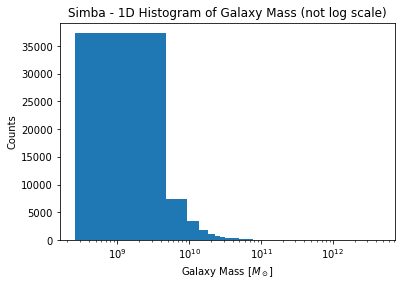

In [148]:
plt.hist(mass_float,bins=1000)
plt.title('Simba - 1D Histogram of Galaxy Mass (not log scale)')
plt.xscale('log')
plt.ylabel('Counts')
plt.xlabel('Galaxy Mass [$ M_\odot $]')
#plt.savefig("Simba_GalaxyStellarMass_Hist1D_nonlog.jpeg", dpi=500)
plt.show()

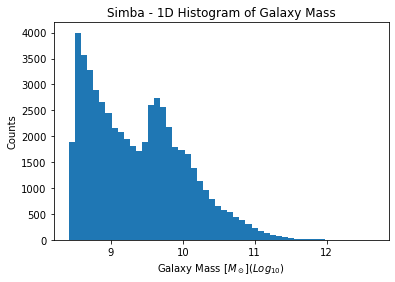

In [123]:
plt.hist(galaxy_mass_log,bins=50)
plt.title('Simba - 1D Histogram of Galaxy Mass')
plt.ylabel('Counts')
plt.xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
#plt.savefig("Simba_GalaxyStellarMass_Hist1D.jpeg", dpi=500)
plt.show()

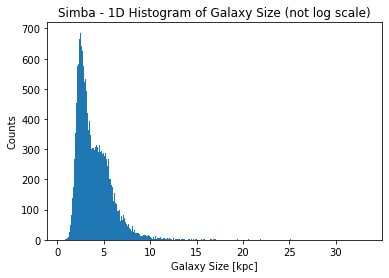

In [149]:
plt.hist(rdisk_float,bins=1000)
plt.title('Simba - 1D Histogram of Galaxy Size (not log scale)')
plt.ylabel('Counts')
plt.xlabel('Galaxy Size [kpc]')
#plt.savefig("Simba_GalaxySize_Hist1D_nonlog.jpeg", dpi=500)
plt.show()

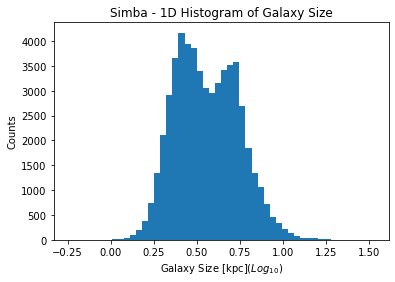

In [124]:
plt.hist(galaxy_size_log,bins=50)
plt.title('Simba - 1D Histogram of Galaxy Size')
plt.ylabel('Counts')
plt.xlabel('Galaxy Size [kpc]($ Log_{10} $)')
#plt.savefig("Simba_GalaxySize_Hist1D.jpeg", dpi=500)
plt.show()

#### 2D Histogram

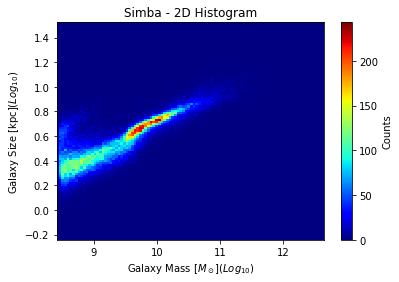

In [125]:
# Figure using the Matplotlib hist2d

plt.hist2d(galaxy_mass_log, galaxy_size_log, cmap = plt.cm.jet, bins=100)
plt.title('Simba - 2D Histogram')
plt.ylabel('Galaxy Size [kpc]($ Log_{10} $)')
plt.xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
cbar2 = plt.colorbar()
cbar2.ax.set_ylabel('Counts')
#plt.savefig("Simba_GalaxyStellarMass_vs_Size_v1.jpeg", dpi=500)
plt.show()

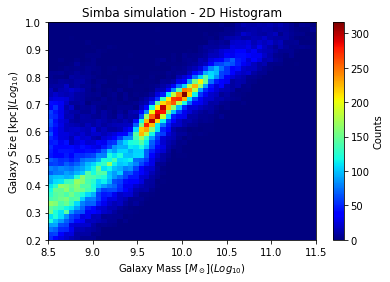

In [126]:
# Figure using the Matplotlib hist2d where histogram range is defined

plt.hist2d(galaxy_mass_log, galaxy_size_log, cmap = plt.cm.jet, bins=50,  range=[[8.5,11.5],[0.2,1.0]]  )
plt.title('Simba simulation - 2D Histogram')
plt.ylabel('Galaxy Size [kpc]($ Log_{10} $)')
plt.xlabel('Galaxy Mass [$ M_\odot $]($ Log_{10} $)')
plt.savefig("GalaxyStellarMass_vs_Size_Hist2D_pyplot_log_v2.jpeg", dpi=500)
cbar2 = plt.colorbar()
cbar2.ax.set_ylabel('Counts')
#plt.savefig("Simba_GalaxyStellarMass_vs_Size_Hist2D_v1.jpeg", dpi=500)
plt.show()